In [1]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from copulae import *

data = pd.read_csv('../processed_data/btc_future_crix.csv')
data.head()

ecdf_brr = ECDF(data.return_brr)
ecdf_btc = ECDF(data.return_btc)

In [2]:
def K_Uniform(u):
    u = np.abs(u)
    return 0.5*(u <= 1)

def K_Triangle(u):
    u = np.abs(u)
    return (1-u)*(u <= 1)

def K_Epanechnikov(u):
    return (3/4)*(1-u**2)*(np.abs(u)<=1)

def K_Gaussian(u):
    return np.exp(-0.5*u**2)/np.sqrt(2*np.pi)

In [147]:
%%time
def K_star_K(u,K=K_Gaussian):
    fn = lambda v: K(u-v)*K(v)
    return scipy.integrate.quad(fn, -np.inf, np.inf)[0]
K_star_K(1)

CPU times: user 1.21 ms, sys: 47 µs, total: 1.26 ms
Wall time: 1.26 ms


0.21969564473386166

In [5]:
def f(x, data, h, K=K_Gaussian):
    u = lambda x: (x - data)/h
    s = np.sum(K(u(x)))
    return s/(len(data)*h)

In [140]:
uq = np.quantile(data.return_brr, .75)
lq = np.quantile(data.return_brr, .25)

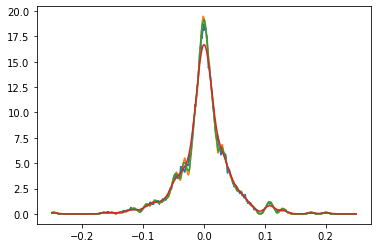

In [142]:
x = np.linspace(-0.25,0.25,1000)
h_rot = 1.06*np.std(data.return_brr)*len(data.return_brr)**(-1/5)
h_brot =  1.06*min(np.std(data.return_brr), (uq-lq)/1.34)*len(data.return_brr)**(-1/5)
h = h_brot
plt.plot(x,[f(x[i],data.return_brr,h, K_Uniform) for i in range(1000)])
plt.plot(x,[f(x[i],data.return_brr,h, K_Triangle) for i in range(1000)])
plt.plot(x,[f(x[i],data.return_brr,h, K_Epanechnikov) for i in range(1000)])
plt.plot(x,[f(x[i],data.return_brr,h, K_Gaussian) for i in range(1000)])

In [144]:
h_brot

0.00732460853848504

In [127]:
import random

def sample_Tri(size, data, h):
    datasample = random.choices(data,k=size)
    u1 = stats.uniform().rvs(size)
    u2 = stats.uniform().rvs(size)
    kernelsample = (u1+u2-1) *h
    return datasample + kernelsample 

def sample_Uni(size, data, h):
    datasample = random.choices(data,k=size)
    u1 = stats.uniform().rvs(size)
    kernelsample = u1*h
    return datasample + kernelsample 

def sample_Epanechnikov(size, data, h):
    datasample = random.choices(data,k=size)
    u1 = stats.uniform().rvs(size)*2-1
    u2 = stats.uniform().rvs(size)*2-1
    u3 = stats.uniform().rvs(size)*2-1
    kernelsample = u3[:]
    i = ( np.abs(u3) >= np.abs(u2) ) & ( np.abs(u3) >= np.abs(u1) )
    kernelsample[i] = u2[i]
    kernelsample = kernelsample*h
    return datasample + kernelsample 

def sample_Gaussian(size, data, h):
    datasample = random.choices(data,k=size)
    kernelsample = stats.norm().rvs(size)*h
    return datasample + kernelsample 

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


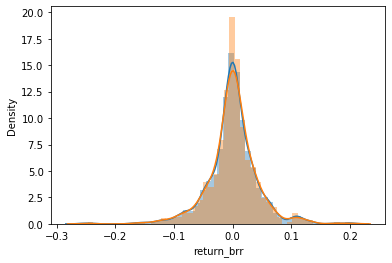

In [153]:
sns.distplot(sample_Gaussian(20000, data.return_brr, h_brot))
sns.distplot(data.return_brr)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


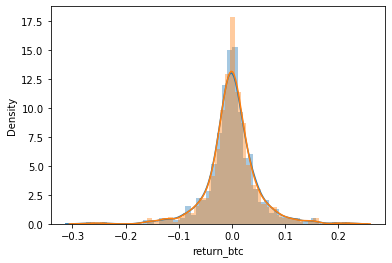

In [36]:
sns.distplot(data.return_btc + trisample*0.01)
sns.distplot(data.return_btc)

In [27]:
y=np.array([f(x[i],data.return_brr,0.01, K_Uniform) for i in range(1000)])

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


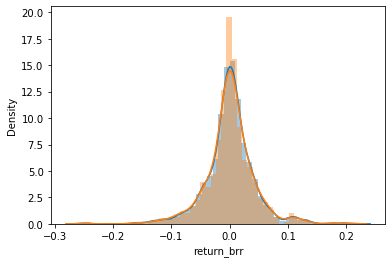

In [2]:
from KDEs import *

kde = KDE(data.return_brr, "Gaussian")
sns.distplot(kde.rvs(10000))
sns.distplot(kde.data)

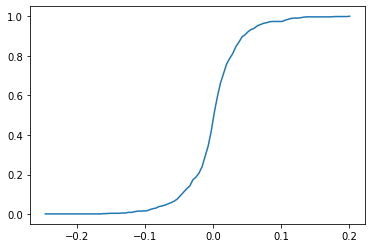

In [10]:
x= np.linspace(min(kde.data),max(kde.data),100)
plt.plot(x,kde.cdf(x))
# plt.plot(x,kde.pdf(x))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


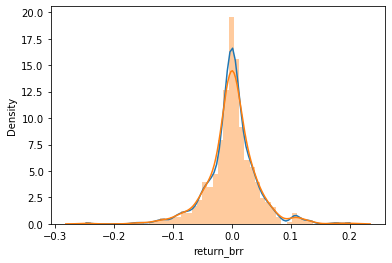

In [11]:
plt.plot(x, [kde.pdf(y) for y in x])
sns.distplot(kde.data)

In [25]:
%%time 
kde.pdf(0)

CPU times: user 1.45 ms, sys: 245 µs, total: 1.7 ms
Wall time: 1.51 ms


16.68037993684482

In [144]:
brr_normalised = (data.return_brr - np.mean(data.return_brr) ) / np.std(data.return_brr)
btc_normalised = (data.return_btc - np.mean(data.return_btc) ) / np.std(data.return_btc)


# def loss(data, df):
#     return np.mean(np.log(stats.t.pdf(data, df=df)))
    
def loss(data, loc, scale, df):
    if df <= 2:
        return -5000
    return np.mean(np.log(stats.t(loc=loc,scale=scale,df=df).pdf(data)))

fn = lambda x: -loss(brr_normalised, x[0],x[1],x[2])

result = scipy.optimize.fmin(fn, (0,1,10))
print(result)

Optimization terminated successfully.
         Current function value: 1.307527
         Iterations: 111
         Function evaluations: 194
[0.01656656 0.55917455 2.29039561]


In [159]:

m = np.mean(data.return_brr)
s = np.std(data.return_brr)

brr_normalised = (data.return_brr -m  ) / s
btc_normalised = (data.return_btc - np.mean(data.return_btc) ) / np.std(data.return_btc)

# def loss(data, df):
#     return np.mean(np.log(stats.t.pdf(data, df=df)))
    
def loss(data, loc, scale, df):
    if df <= 2:
        return -5000
    return np.mean(np.log(stats.t(loc=loc,scale=scale,df=df).pdf(data)))

fn = lambda x: -loss(brr_normalised, 0,1,x[2])

result = scipy.optimize.fmin(fn, (0,1,10))
print(result)

Optimization terminated successfully.
         Current function value: 1.383171
         Iterations: 44
         Function evaluations: 89
[2.39047753e-04 1.03100422e+00 8.57871269e+00]


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


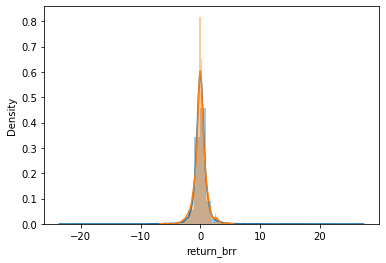

In [145]:
sns.distplot(stats.t(loc=result[0], scale=result[1], df=result[2]).rvs(10000))
sns.distplot(brr_normalised)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


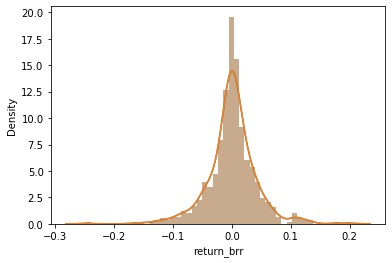

In [160]:
sns.distplot((brr_normalised * s )+ m)
sns.distplot(data.return_brr)

In [161]:
s

0.0417510451863394

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


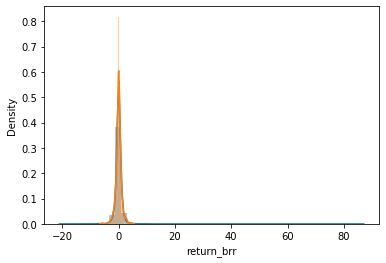

In [140]:
sns.distplot(stats.t(loc=result[0], scale=result[1], df=result[2]).rvs(10000))
sns.distplot(brr_normalised)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


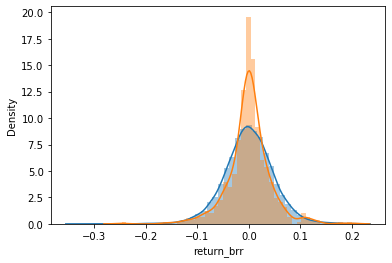

In [42]:
sns.distplot(stats.t(df=8.578).rvs(10000)*np.std(data.return_brr)+np.mean(data.return_brr))
sns.distplot(data.return_brr)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


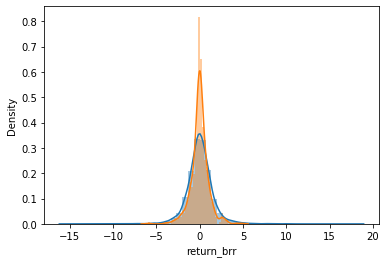

In [57]:
sns.distplot(stats.t(df=3.3).rvs(10000))
sns.distplot(brr_normalised)

In [86]:
def loss(data, loc, scale, df):
    if df <= 2:
        return -5000
    return np.mean(np.log(stats.t(loc=loc,scale=scale,df=df).pdf(data)))

In [87]:
fn = lambda x: -loss(data.return_brr,x[0],x[1],x[2])
result = scipy.optimize.fmin(fn, (0,1,10),
                             maxiter=10000,
                             maxfun=10000)

Optimization terminated successfully.
         Current function value: -1.868504
         Iterations: 215
         Function evaluations: 400


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


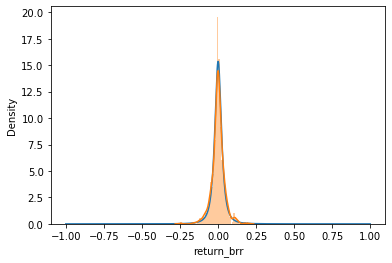

In [95]:
x = np.linspace(-1,1,1000)
plt.plot(x,stats.t(loc=result[0],scale=result[1],df=result[2]).pdf(x))
sns.distplot(data.return_brr)

In [103]:
fitted_t = stats.t(loc=result[0],scale=result[1],df=result[2])

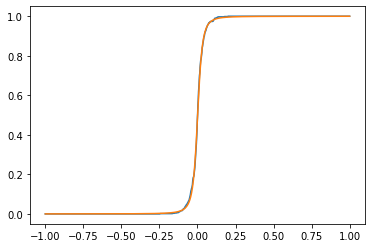

In [104]:
ecdf = ECDF(data.return_brr)
plt.plot(x,ecdf(x))
plt.plot(x,fitted_t.cdf(x))

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


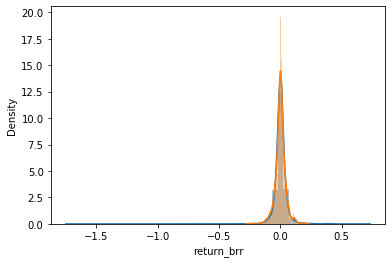

In [109]:
sns.distplot(fitted_t.rvs(10000))
sns.distplot(data.return_brr)

In [131]:
T = stats.t(df=10).rvs(100000)
testing_data = 500 + 100*T

fn = lambda x: -loss(testing_data,x[0],x[1],x[2])
result = scipy.optimize.fmin(fn, (500,100,10),
                             maxiter=10000,
                             maxfun=10000)

Optimization terminated successfully.
         Current function value: 6.125909
         Iterations: 61
         Function evaluations: 112


In [132]:
result

array([500.11745237, 100.33784862,  10.38775963])

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


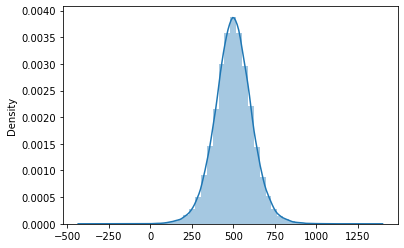

In [130]:
sns.distplot(testing_data)

In [168]:
D = data.return_brr
kdes = [KDE(np.array([d]), 'Gaussian') for d in D]

In [176]:
F = [kdes[i].pdf(0.01) for i in range(len(D))]

In [188]:
kde = KDE(D, 'Gaussian')

In [232]:
u = lambda x: (x - D)/kde.h_brot
K_cdf = norm(scale=kde.h_brot)

x_arr = np.linspace(-0.3,0.3,1000)
results = []

for x in x_arr:
    results.append(np.mean(K_cdf.cdf(u(x))))

ecdf = ECDF(D)

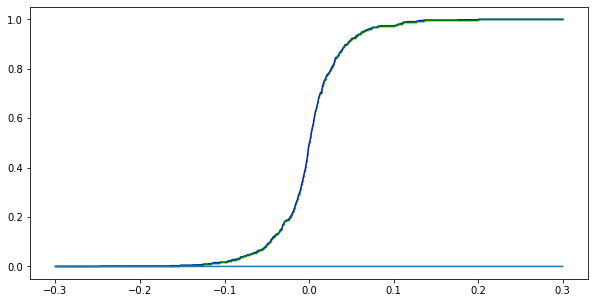

In [235]:
plt.figure(figsize=(10,5))
plt.plot(x_arr, results, 'b-', markersize=1)
plt.plot(x_arr, ecdf(x_arr), 'g.', markersize=1)
plt.plot(x_arr, (results - ecdf(x_arr))**2)

In [234]:
np.sum((results - ecdf(x_arr))**2)

3.2816126124756166e-05

In [313]:
kde_proposal = KDE(D*10, 'Gaussian')
kde_target   = KDE(D, "Gaussian")

In [314]:
sample_proposal = kde_proposal.rvs(20000)

In [315]:
p = np.array([kde_proposal.pdf(sample_proposal[i]) for i in range(len(sample_proposal))])
q = np.array([kde_target.pdf(sample_proposal[i]) for i in range(len(sample_proposal))])

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


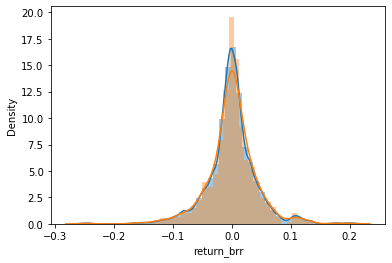

In [316]:
S = np.random.choice(sample_proposal, p=q/p/sum(q/p), size=200000)
sns.distplot(S)
sns.distplot(D)

In [317]:
max(kde_target.rvs(200000))

0.2217694587294419

In [318]:
max(S)

0.22029499805072678

In [319]:
max(D)

0.20025172800119664

In [323]:
min(kde_target.rvs(200000))

-0.27096567781743053

In [324]:
min(S)

-0.2632271376099256

In [325]:
min(D)

-0.24703383936521514